In [4]:
import os, time, random
import numpy as np
import pandas as pd
import cv2, torch
from tqdm.auto import tqdm
import shutil as sh

from IPython.display import Image, clear_output
import matplotlib.pyplot as plt

In [5]:
img_h, img_w, num_channels = (380, 676, 3)
df = pd.read_csv('data/train_solution_bounding_boxes (1).csv')
df.rename(columns={'image':'image_id'}, inplace=True)
df['image_id'] = df['image_id'].apply(lambda x: x.split('.')[0])
df['x_center'] = (df['xmin'] + df['xmax'])/2
df['y_center'] = (df['ymin'] + df['ymax'])/2
df['w'] = df['xmax'] - df['xmin']
df['h'] = df['ymax'] - df['ymin']
df['classes'] = 0
df['x_center'] = df['x_center']/img_w
df['w'] = df['w']/img_w
df['y_center'] = df['y_center']/img_h
df['h'] = df['h']/img_h

Image ID: vid_4_4560


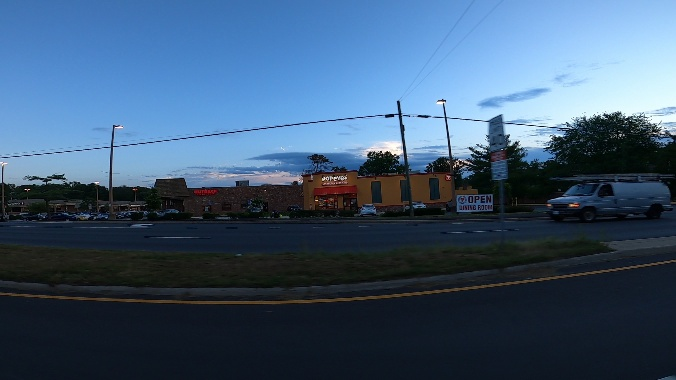

In [6]:
index = list(set(df.image_id))
image = random.choice(index)
print("Image ID: %s"%(image))
img = cv2.imread(f'data/training_images/{image}.jpg')
image = random.choice(index)
Image(filename=f'data/training_images/{image}.jpg',width=600)

In [7]:
source = 'training_images'
if True:
    for fold in [0]:
        val_index = index[len(index)*fold//5:len(index)*(fold+1)//5]
        for name,mini in tqdm(df.groupby('image_id')):
            if name in val_index:
                path2save = 'val2017/'
            else:
                path2save = 'train2017/'
            if not os.path.exists('predict/fold{}/labels/'.format(fold)+path2save):
                os.makedirs('predict/fold{}/labels/'.format(fold)+path2save)
            with open('predict/fold{}/labels/'.format(fold)+path2save+name+".txt", 'w+') as f:
                row = mini[['classes','x_center','y_center','w','h']].astype(float).values
                row = row.astype(str)
                for j in range(len(row)):
                    text = ' '.join(row[j])
                    f.write(text)
                    f.write("\n")
            if not os.path.exists('predict/fold{}/images/{}'.format(fold,path2save)):
                os.makedirs('predict/fold{}/images/{}'.format(fold,path2save))
            sh.copy("data/{}/{}.jpg".format(source,name),'predict/fold{}/images/{}/{}.jpg'.format(fold,path2save,name))

100%|██████████| 355/355 [00:00<00:00, 361.29it/s]


In [9]:
!python yolov5/detect.py --weights yolov5/yolov5s.pt --img 676 --conf 0.4 --source data/testing_images

detect: weights=['yolov5/yolov5s.pt'], source=data/testing_images, data=yolov5\data\coco128.yaml, imgsz=[676, 676], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-295-gac6c4383 Python-3.10.5 torch-2.2.1+cpu CPU


  0%|          | 0.00/14.1M [00:00<?, ?B/s]
  7%|▋         | 1.00M/14.1M [00:00<00:01, 10.4MB/s]
 15%|█▌        | 2.17M/14.1M [00:00<00:01, 11.4MB/s]
 23%|██▎       | 3.27M/14.1M [00:00<00:01, 9.84MB/s]
 35%|███▌      | 5.00M/14.1M [00:00<00:00, 12.8MB/s]
 44%|████▍     | 6.28M/14.1M [00:00<00:00, 12.9MB/s]
 53%|█████▎    | 7.54M/14.1M [00:00<00:00, 12.9MB/s]
 63%|██████▎   | 8.86M/14.1M [00:00<00:00, 13.0MB/s]
 72%|███████▏  | 10.1M/14.1M [0

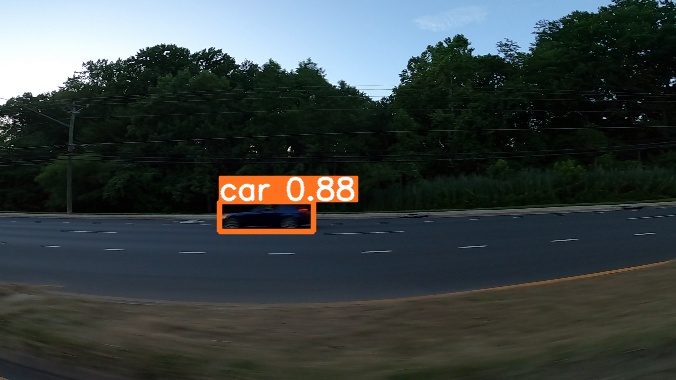

In [11]:
predicted_files = []
for (dirpath, dirnames, filenames) in os.walk("runs/detect/py"):
    predicted_files.extend(filenames)
Image(filename='yolov5/runs/detect/exp/vid_5_29400.jpg')
